In [ ]:
# Custom methods to clean up the source code a bit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class cust():

    def __init__(self, dat):
        self.dat = dat


    def xy(self, x_dummies_list, X_list, y_list):

        X = self.dat[X_list]
        y = self.dat[y_list]

        # One hot encoding the pg column
        X = pd.get_dummies(X, columns = x_dummies_list, drop_first = True)
        # C_cols should be after get_dummies so we get ALL columns
        x_cols = X.columns
        # Convert the two into value arrays
        X = X.values
        y = y.values
        # We need y as a 1D array
        y = np.ravel(y)

        return X,y,x_cols


    # Same as xy except returns a dataframe instead of a float64 np array
    def xy_df(self, x_dummies_list, X_list, y_list):

        X = self.dat[X_list]
        y = self.dat[y_list]

        # One hot encoding the pg column
        X = pd.get_dummies(X, columns = x_dummies_list, drop_first = True)
        # C_cols should be after get_dummies so we get ALL columns
        x_cols = X.columns
        # We need y as a 1D array
        y = np.ravel(y)

        return X,y,x_cols


    def clean_data(self):
        self.dat.replace([np.inf, -np.inf], np.nan) # Replace inf
        self.dat = self.dat.dropna(axis=0, how = 'any') # Drop NA's on the rows axis
        # I kept getting a value error and this was the only thing that seemed to fix it
        self.dat = self.dat[~self.dat.isin([np.nan, np.inf, -np.inf]).any(1)]
        return self.dat


    def outlier_removal(self,var):
        IQR = self.dat[var].describe()['75%'] - self.dat[var].describe()['25%']
        min_val = self.dat[var].describe()['25%'] - (IQR * 1.5)
        max_val = self.dat[var].describe()['75%'] + (IQR * 1.5)

        self.dat = self.dat[(self.dat[var] > min_val) & (self.dat[var] < max_val)]
        plt.boxplot(self.dat[var])
        return self.dat

    @staticmethod
    def comparison_df(y_pred, y_test):
        # Dataframe of pred and actual y
        comparison_df = pd.DataFrame({'y_pred':y_pred, 'y_test':y_test})
        comparison_df['abs_difference'] = abs( comparison_df['y_pred'] - comparison_df['y_test'] )
        comparison_df['real_difference'] = comparison_df['y_pred'] - comparison_df['y_test']
        print(comparison_df.describe())
        # Show all sums
        print(comparison_df.sum())
        # Show average difference
        print ("Average Difference: ", comparison_df.sum()[2] / len(comparison_df))

        return comparison_df

In [ ]:
#%cd /content/drive/MyDrive/Prediction/Rangpur_Region

/content/drive/MyDrive/Prediction/Rangpur_Region


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
columns = ['Time', 'Node', 'Total(MB)']
data = pd.read_excel("Prediction_dataset.xlsx")
data.Time = pd.to_datetime(data.Time)
node_list = data["Node"]
nodes = node_list.unique()

Summary Statistics - ADF Test For Stationarity

ADF Stat is: -4.185661127017565.
P Val is: 0.0006967086191609556.
Critical Values (Significance Levels): 
1% : -3.494
5% : -2.889
10% : -2.582
Summary Statistics - ADF Test For Stationarity

ADF Stat is: -3.6795555395368655.
P Val is: 0.004410088740977472.
Critical Values (Significance Levels): 
1% : -3.495
5% : -2.89
10% : -2.582
Summary Statistics - ADF Test For Stationarity

P Value is high. Consider Differencing: 0.08684216805141182
Summary Statistics - ADF Test For Stationarity

ADF Stat is: -4.6058314679042525.
P Val is: 0.0001260102850538495.
Critical Values (Significance Levels): 
1% : -3.495
5% : -2.89
10% : -2.582
Summary Statistics - ADF Test For Stationarity

P Value is high. Consider Differencing: 0.2606106007647164
Summary Statistics - ADF Test For Stationarity

P Value is high. Consider Differencing: 0.13738145420891956
Summary Statistics - ADF Test For Stationarity

ADF Stat is: -4.071604778563919.
P Val is: 0.001078656790

/home/mushfiq/anaconda3/envs/nural_prjct/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/mushfiq/anaconda3/envs/nural_prjct/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/mushfiq/anaconda3/envs/nural_prjct/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/mushfiq/anaconda3/envs/nural_prjct/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/mushfiq/an

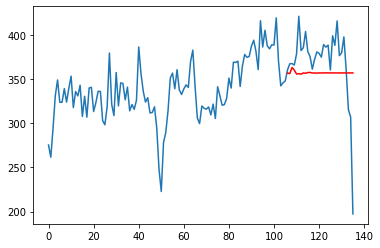

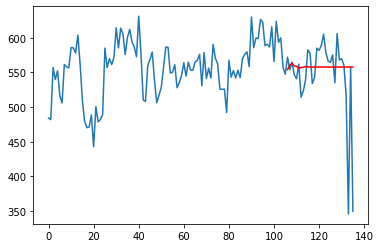

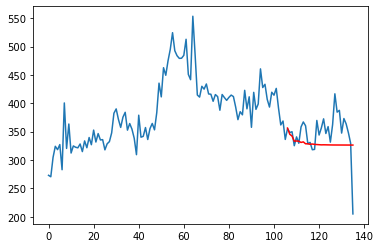

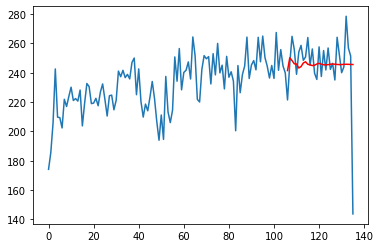

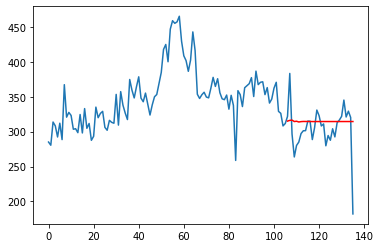

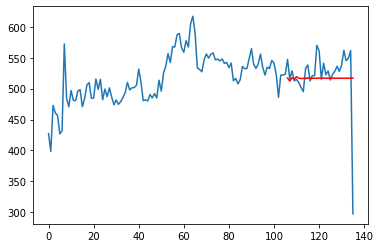

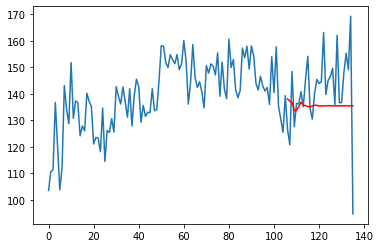

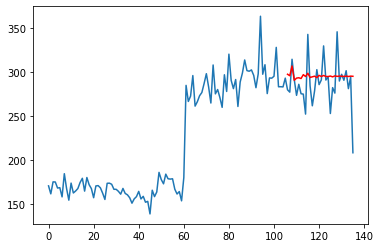

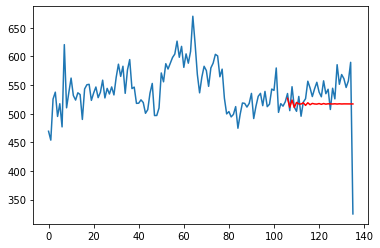

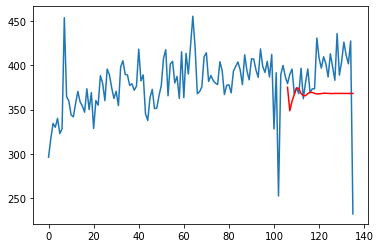

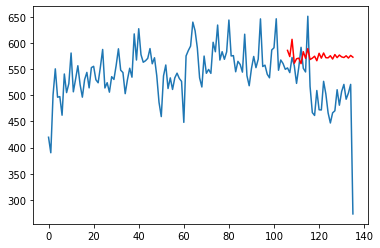

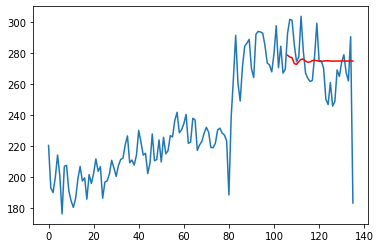

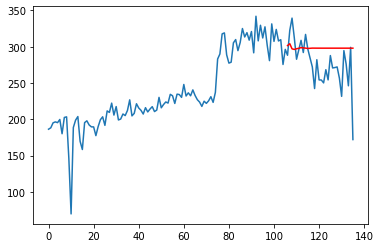

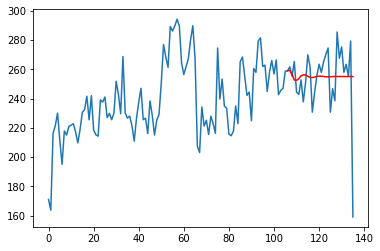

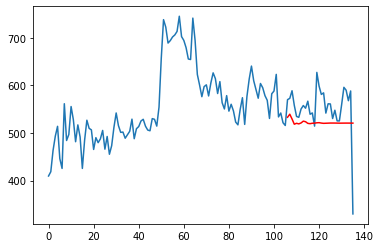

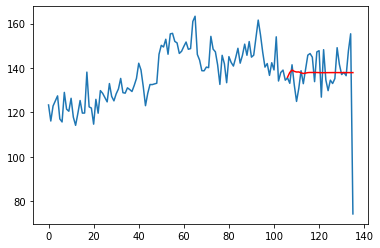

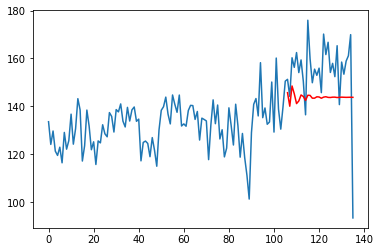

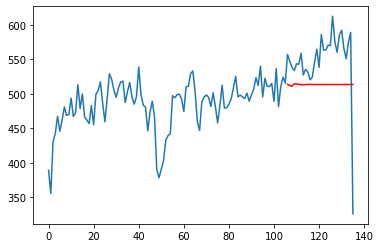

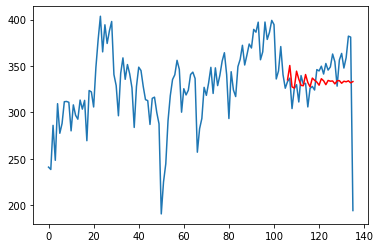

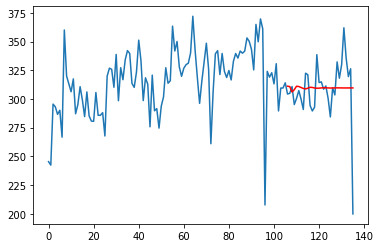

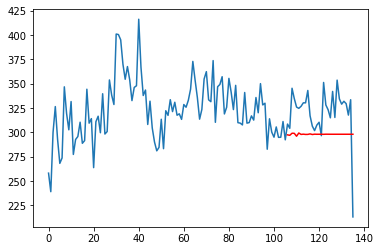

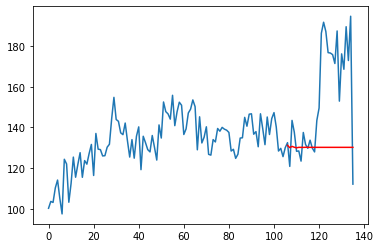

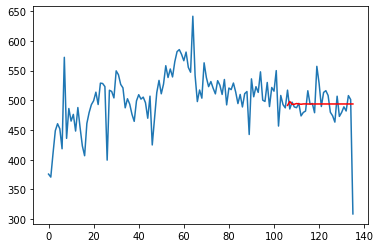

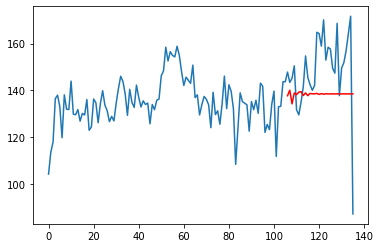

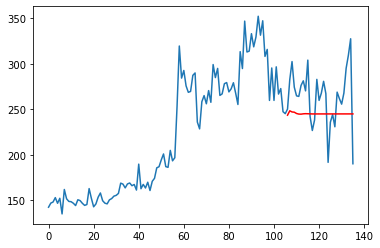

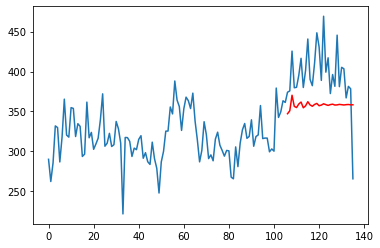

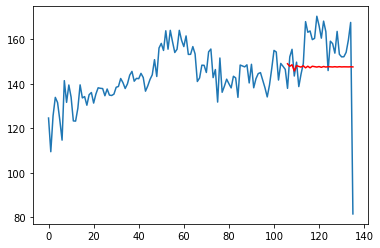

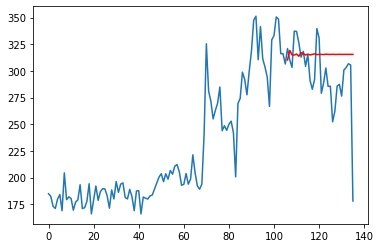

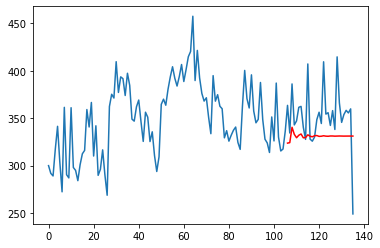

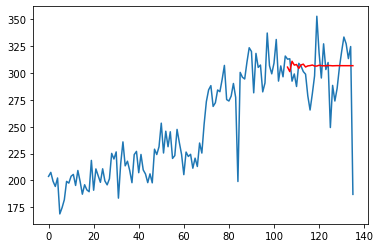

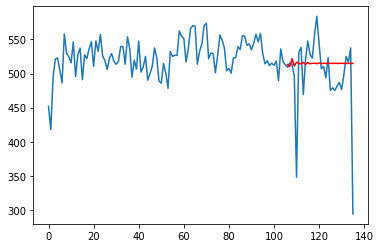

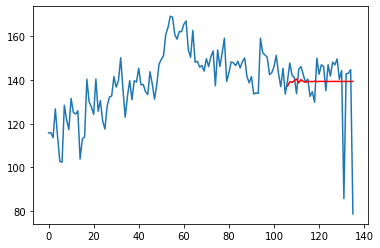

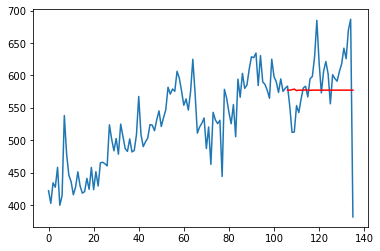

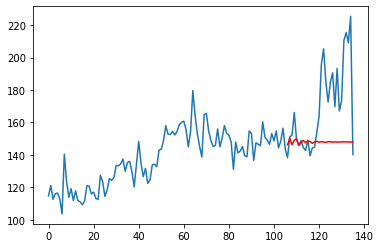

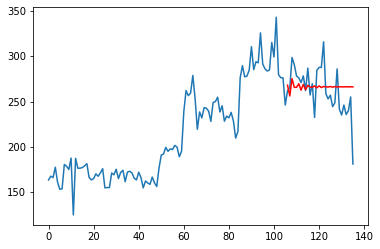

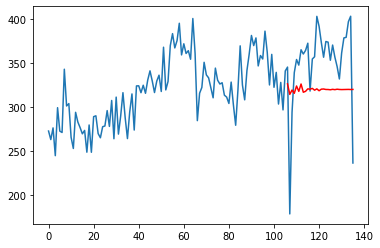

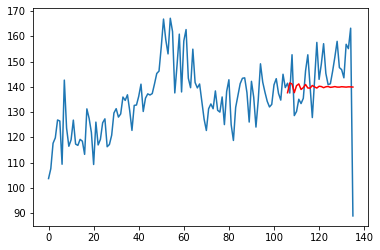

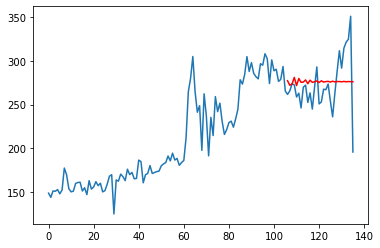

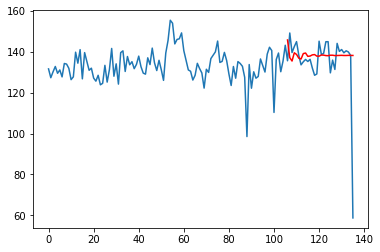

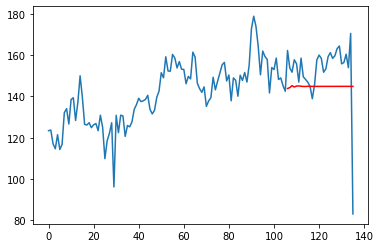

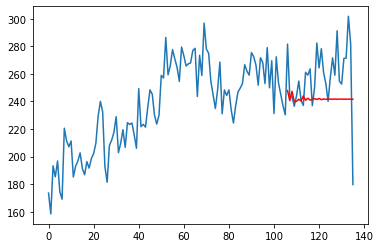

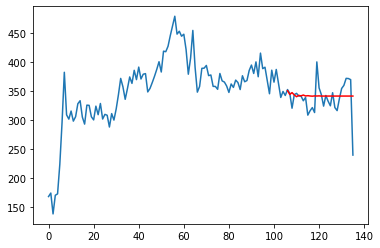

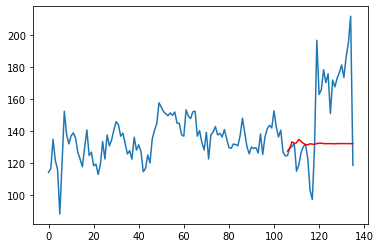

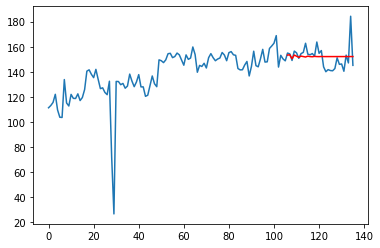

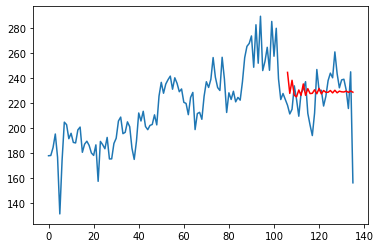

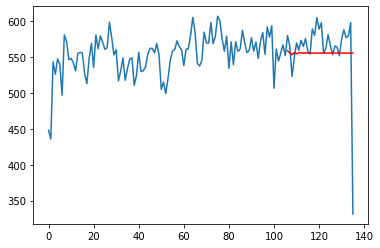

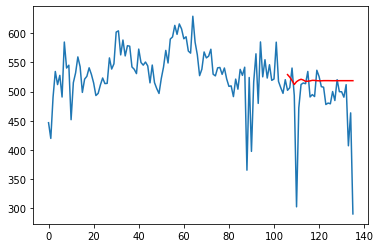

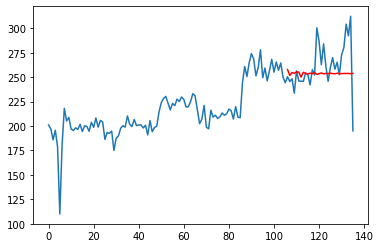

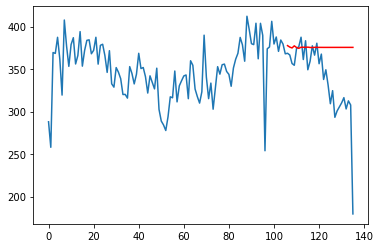

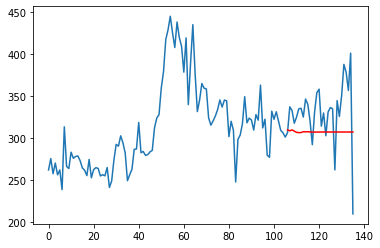

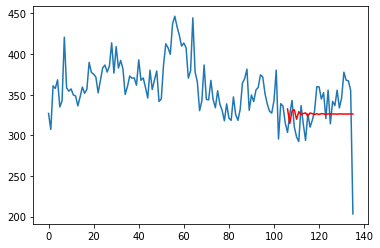

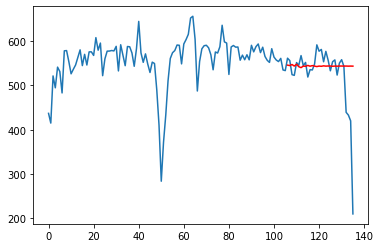

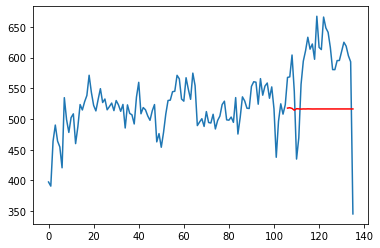

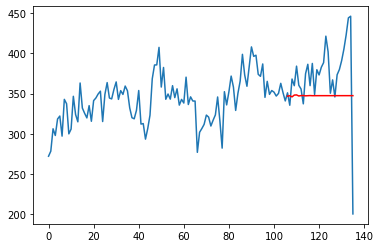

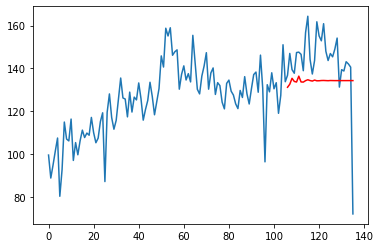

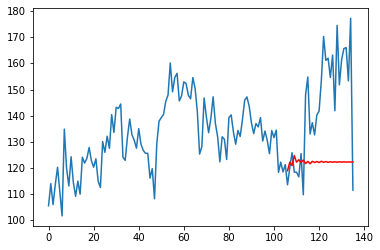

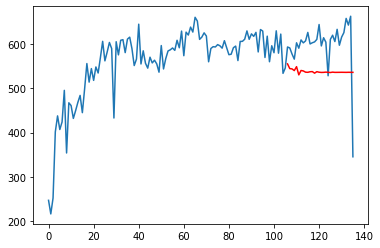

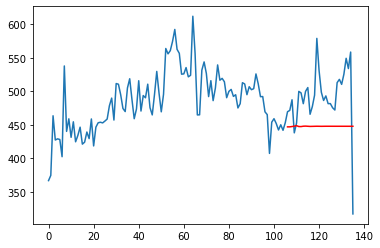

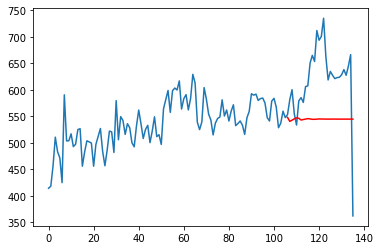

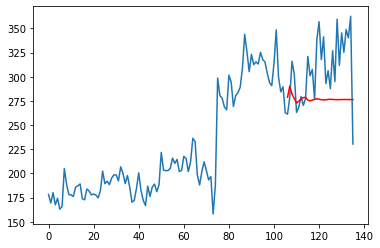

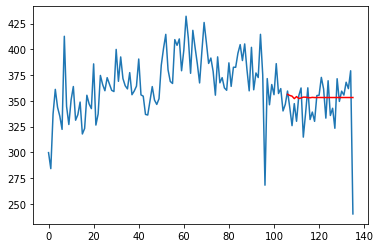

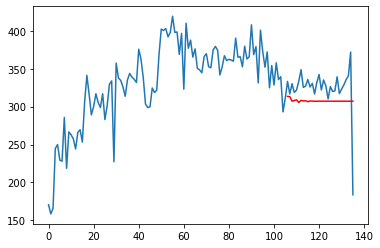

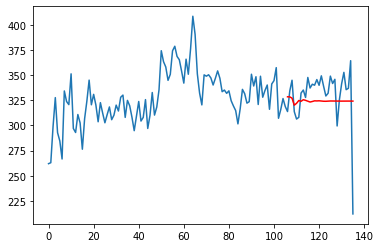

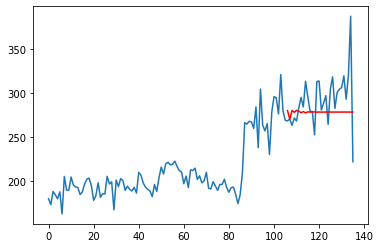

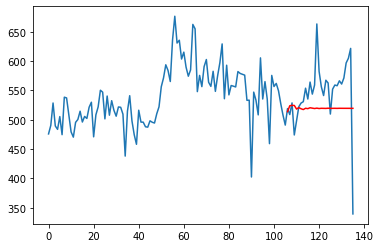

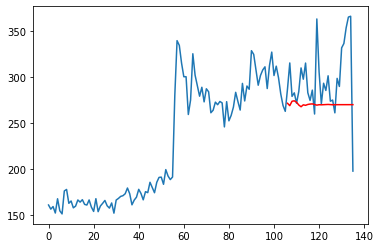

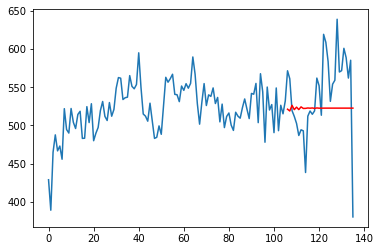

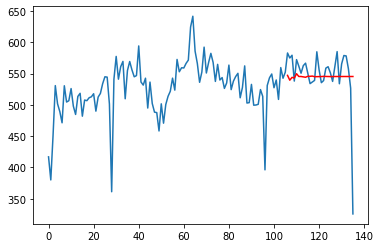

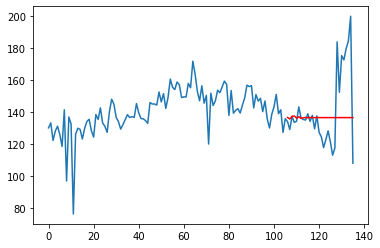

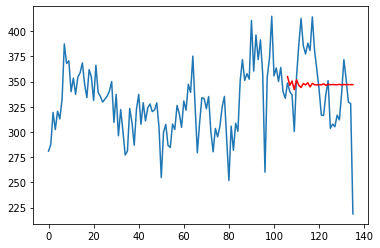

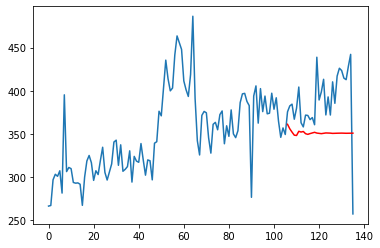

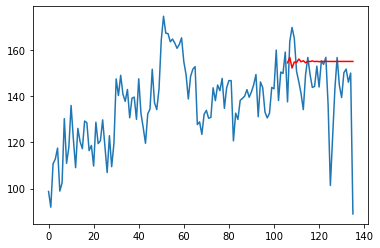

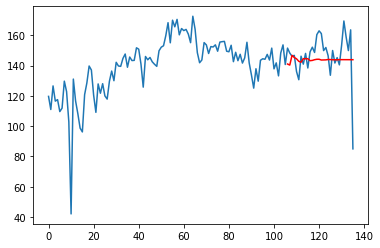

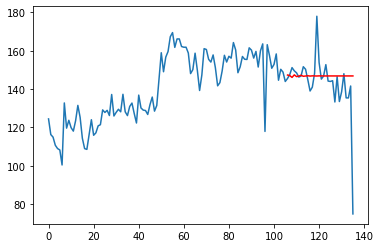

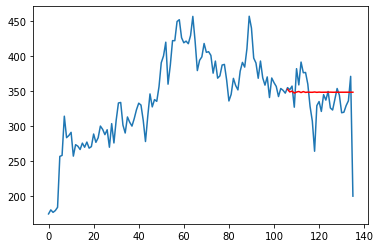

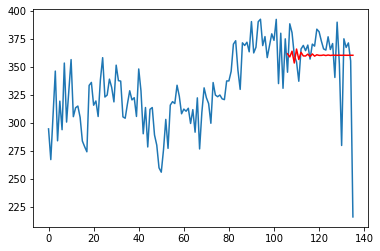

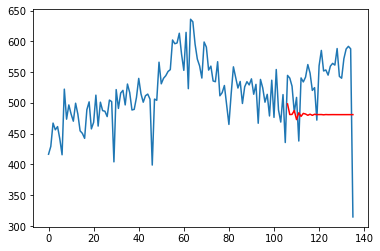

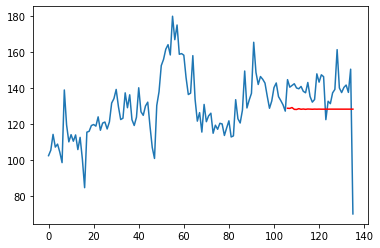

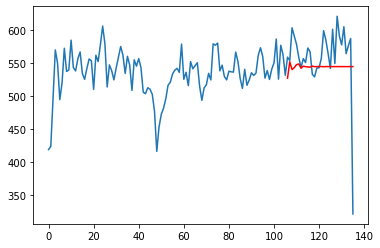

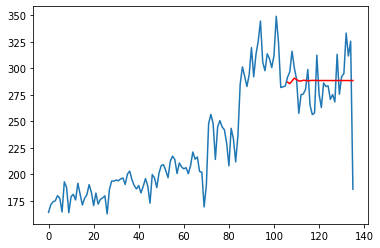

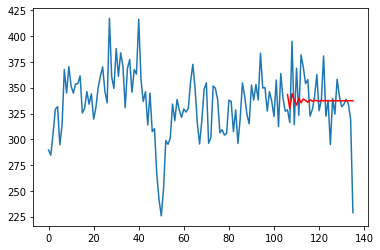

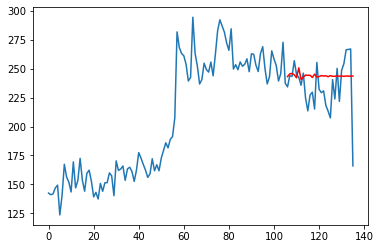

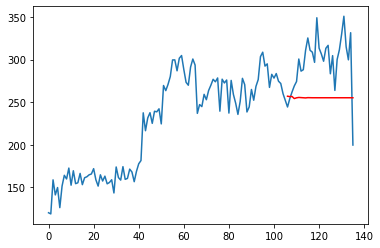

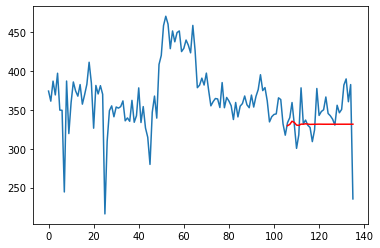

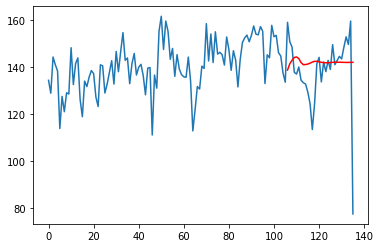

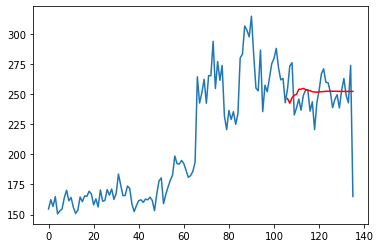

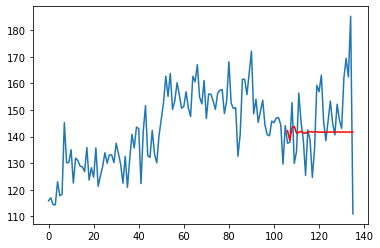

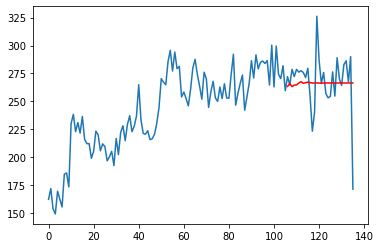

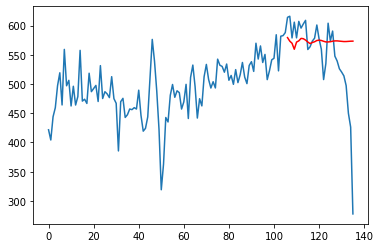

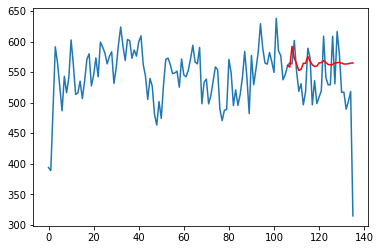

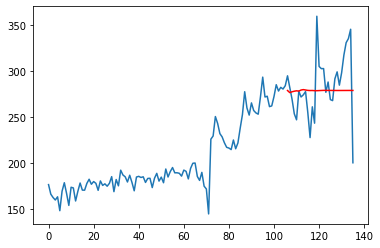

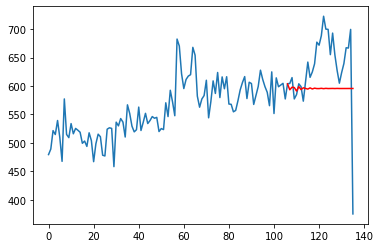

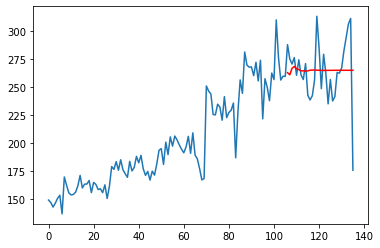

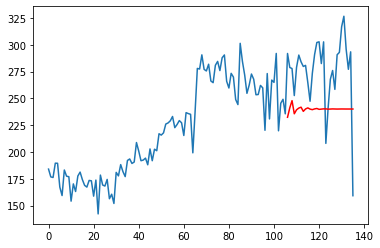

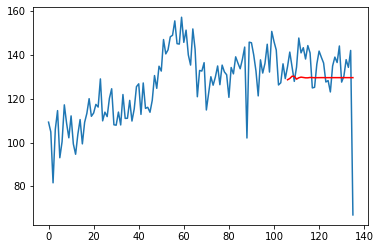

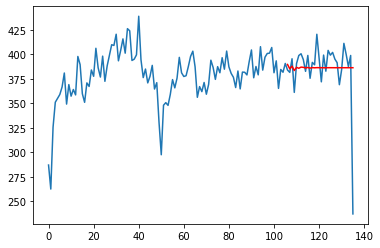

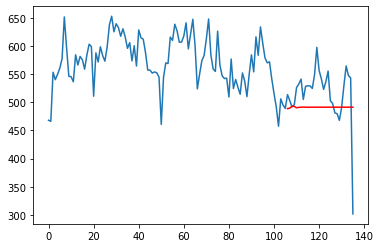

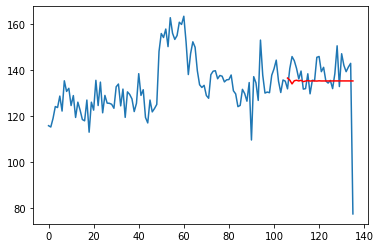

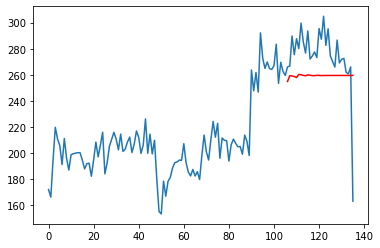

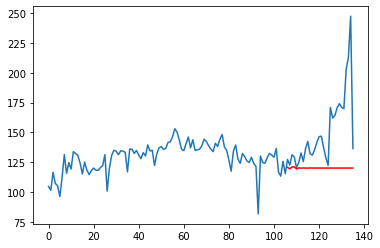

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import LSTM_Prep_univariate
import numpy as np
from sklearn.metrics import mean_squared_error
split = 1
sequence_length = 8
pred_days = 30 # predicted_vs_actual plot
EPOCHS = 50
validation = 0.2
import csv
f = open('excel_out_ARIMA_kpi_.csv', 'w')
g = open('excel_out_ARIMA_.csv', 'w')
writer = csv.writer(f)
writer2 = csv.writer(g)
header_written = False
for node in nodes:
    node_index = data["Node"] == node
    my_data = data[node_index]
    row_data=[node]

    data_prep = LSTM_Prep_univariate.Data_Prep(dataset = my_data)
    rnn_df, validation_df = data_prep.preprocess_rnn(date_colname = 'Time', numeric_colname = 'Total(GB)', pred_set_timesteps = pred_days)
    validation_df = validation_df.sort_index(ascending=True)
    validation_df = validation_df.reset_index()

    features = rnn_df['Total(GB)']
    features.index = rnn_df['Time']
    features.head()

    validations = validation_df['Total(GB)']
    validation_df.index = validation_df['Time']
    validation_df.head()
    plt.show()

    # fit model
    model = ARIMA(features, order=(7,1,0))
    model_fit = model.fit()
    residuals = pd.DataFrame(model_fit.resid)


    train, test = features.values, validations.values
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(7,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(yhat)
    # evaluate forecasts
    rmse = np.sqrt(mean_squared_error(test, predictions))
    #print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    plt.plot(train.tolist()+test.tolist())
    plt.plot([None]*len(train)+predictions, color='red')
    plt.show()

    meas_nam, meas_v = calc_metrics(test,predictions)
    if not header_written:
        writer.writerow(['eNodeB']+meas_nam)
        header_written=True
    writer.writerow(row_data+meas_v)
    writer2.writerow(row_data+train.tolist()+test.tolist())
    writer2.writerow(['']*(len(train)+1)+predictions)


f.close()
g.close()

In [ ]:
!pip install statsmodels

In [ ]:
def calc_metrics(true_y, predicted_y):
    metric_names = ['Forecast Bias', 'R-sqr', 'MAE', 'RMSE', 'MAPE']

    forecast_errors = [predicted_y[i]-true_y[i] for i in range(len(predicted_y))]
    bias = sum(forecast_errors) * 1.0/len(predicted_y)
    mean_absolute_error = np.mean( np.abs(forecast_errors) )
    root_mean_squared_error = np.sqrt(np.mean([number ** 2 for number in forecast_errors]))
    Unexplained_var = np.sum([number ** 2 for number in forecast_errors])
    mean_of_true = np.mean(true_y)
    Total_var = np.sum([(number-mean_of_true) ** 2 for number in true_y])
    r_sqr = 1 - Unexplained_var/Total_var
    percentage_error = [(predicted_y[i]-true_y[i])/true_y[i] if true_y[i]>0 else 0 for i in range(len(predicted_y))]
    mean_absolute_percentage_error = np.mean( np.abs(percentage_error) ) * 100

    metric_values = [bias, r_sqr, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error]

    return metric_names, metric_values